In [1]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

#### Specifying the problem.
We will consider a 2-qubit quantum phase estimation of a one-qubit state. <br>
Let us take the unitary matrix to be the Pauli-Y gate. <br>
We initialize three quantum registers, 1 for the state and 2 for the ancilla qubits. <br>
We also initialize two classical registers to hold the measurement of the phase.

In [2]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(2, 'c')
qpe = QuantumCircuit(q, c)

# Initialize qubit 2 to be 1 by applying a Pauli-X gate
qpe.x(q[2])

#### Operations on the circuit

We know that the Pauli gates are involutary.<br>
U<sup>(2<sup>1</sup>)</sup> = Y<sup>2</sup> = I. Therefore, controlled unitary from q[0] is the identity matrix.<br>
U<sup>(2<sup>0</sup>)</sup> = Y<sup>1</sup> = Y. Hence, controlled unitary from q[1] is a controlled-Y gate

In [3]:
qpe.h(q[0])
qpe.h(q[1])

In [4]:
qpe.cy(q[1], q[2]);

In [5]:
# n-qubit Inverse-QFT on q in circuit circ.
def qft_dagger(circ, q, n):
    for j in range(n):
        k = (n-1) - j
        for m in range(k):
            circ.cu1(-math.pi/float(2**(k-m)), q[k], q[m])
        circ.h(q[k])

In [6]:
qft_dagger(qpe, q, 2)
qpe.measure(q[0],c[0])
qpe.measure(q[1],c[1])

#### Drawing the circuit

In [9]:
qpe.draw(output="text")

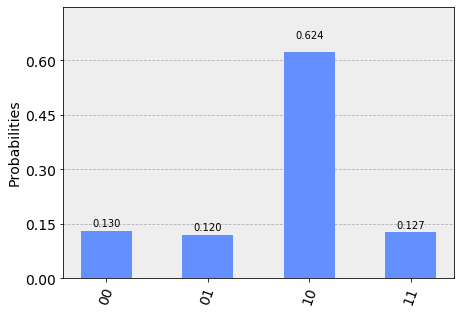

In [8]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

#### Interpreting the output
All Pauli matrices have eigenvalue 1 and -1.<br>
The input state |1⟩ is an eigenvector with eigenvalue −1 = exp( 2πi × 0.5).<br> 
Hence,  θ=0.5  and  2<sup>n</sup>θ=2<sup>3</sup>  if we use  n=2  ancilla qubits.